In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
print("pandas version " + pd.__version__)
print("numpy version " + np.__version__)
print("scipy version " + scipy.__version__)
print("matplotlib version " + matplotlib.__version__)
print("seaborn version " + sns.__version__)
print("statsmodels version " + sm.__version__)

pandas version 1.0.5
numpy version 1.18.5
scipy version 1.5.0
matplotlib version 3.2.2
seaborn version 0.10.1
statsmodels version 0.11.1


In [3]:
df = pd.read_csv(r"medical_clean.csv")

In [4]:
#pd.options.display.float_format = '{:,.6f}'.format
pd.set_option('display.max_columns', None) #show all columns

In [5]:
df['ReAdmis'].value_counts()

No     6331
Yes    3669
Name: ReAdmis, dtype: int64

In [6]:
df.shape

(10000, 50)

Some data Prep

In [7]:
# df.drop(['CaseOrder'], axis=1, inplace=True)

# #dropping "items"
# df.drop(['Item1'], axis=1, inplace=True)
# df.drop(['Item2'], axis=1, inplace=True)
# df.drop(['Item3'], axis=1, inplace=True)
# df.drop(['Item4'], axis=1, inplace=True)
# df.drop(['Item5'], axis=1, inplace=True)
# df.drop(['Item6'], axis=1, inplace=True)
# df.drop(['Item7'], axis=1, inplace=True)
# df.drop(['Item8'], axis=1, inplace=True)

In [8]:
df['Initial_admin'] = df['Initial_admin'].str.replace(' Admission', '')
df['Services'] = df['Services'].str.replace(' ', '_')
df['Marital'] = df['Marital'].str.replace(' ','_')

In [9]:
df.shape

(10000, 50)

In [10]:
#df.isna().any()

In [11]:
print(df.Population.max())

122814


In [12]:
#sns.heatmap(df.isnull())

In [13]:
#df.hist(figsize = (15,15))

In [14]:
df['ReAdmis'].value_counts()

No     6331
Yes    3669
Name: ReAdmis, dtype: int64

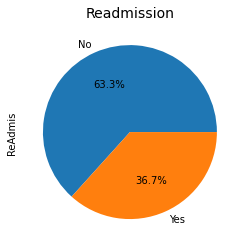

In [15]:
df['ReAdmis'].value_counts().plot.pie(autopct="%.1f%%");
plt.title("Readmission", fontsize=14);

In [16]:
df.groupby('ReAdmis').mean()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
ReAdmis,,,,,,,,,,,,,,,,,,,,,,,
No,3550.541779,49987.470700,38.810183,-91.228998,9739.104249,2.058443,53.263308,40740.257109,17.957993,5.012004,1.010741,0.393619,17.414699,3911.772150,12866.696031,3.531985,3.508608,3.520297,3.516664,3.492497,3.535776,3.497868,3.522982
Yes,7502.458436,50455.863178,38.649146,-91.267379,10355.483510,2.164077,53.940311,40059.521352,17.975079,5.012537,0.985282,0.408013,63.859507,7728.617663,13051.576261,3.496048,3.503407,3.495230,3.512401,3.504497,3.499591,3.487326,3.486781


In [17]:
# #%matplotlib inline
# pd.crosstab(df.Area,df.ReAdmis).plot(kind='bar')
# plt.title('ReAdmission by Area')
# plt.xlabel('Area')
# plt.ylabel('Readmission rate')
# plt.savefig('Area and readmission')

In [18]:
# #%matplotlib inline
# pd.crosstab(df.Marital,df.ReAdmis).plot(kind='bar')
# plt.title('ReAdmission by Marital status')
# plt.xlabel('Marital status')
# plt.ylabel('Readmission rate')
# plt.savefig('Marital status and readmission')

In [19]:
#df.boxplot(column='Initial_days', by='ReAdmis')

In [20]:
#df.boxplot(column='TotalCharge', by='ReAdmis')

In [21]:
df = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'Zip',
       'Lat', 'Lng', 'City', 'State','County','Job','Soft_drink'], axis = 1) 


In [22]:
df = df.dropna(subset=['TimeZone'])

In [23]:
correl  = df.corr()

In [24]:
# fig, ax = plt.subplots(figsize=(15,15))
# sns.heatmap(correl, xticklabels = correl.columns, yticklabels = correl.columns, cmap='RdBu') 

Standardize numerical and create dummy variables

Remove rows with outliers
Using Z-scores to remove outliers

In [25]:
from scipy import stats

#goes row by row to remove outliers with z-score greatner than 3
#df = df[(np.abs(stats.zscore(numerical_data)) < 3).all(axis=1)]


df['z_Population']=stats.zscore(df['Population'])
df['z_Children']=stats.zscore(df['Children'])
df['z_Age']=stats.zscore(df['Age'])
df['z_Income']=stats.zscore(df['Income'])
df['z_VitD_levels']=stats.zscore(df['VitD_levels'])
df['z_Doc_visits']=stats.zscore(df['Doc_visits'])
df['z_Full_meals_eaten']=stats.zscore(df['Full_meals_eaten'])
df['z_vitD_supp']=stats.zscore(df['vitD_supp'])
df['z_Initial_days']=stats.zscore(df['Initial_days'])
df['z_TotalCharge']=stats.zscore(df['TotalCharge'])
df['z_Additional_charges']=stats.zscore(df['Additional_charges'])
df['z_Item1']=stats.zscore(df['Item1'])
df['z_Item2']=stats.zscore(df['Item2'])
df['z_Item3']=stats.zscore(df['Item3'])
df['z_Item4']=stats.zscore(df['Item4'])
df['z_Item5']=stats.zscore(df['Item5'])
df['z_Item6']=stats.zscore(df['Item6'])
df['z_Item7']=stats.zscore(df['Item7'])
df['z_Item8']=stats.zscore(df['Item8'])

In [26]:


#
# filtering by z scores
#


df=df.loc[df['z_Population'].abs()<=3]
df=df.loc[df['z_Children'].abs()<=3]
df=df.loc[df['z_Age'].abs()<=3]
df=df.loc[df['z_Income'].abs()<=3]
df=df.loc[df['z_VitD_levels'].abs()<=3]
df=df.loc[df['z_Doc_visits'].abs()<=3]
df=df.loc[df['z_Full_meals_eaten'].abs()<=3]
df=df.loc[df['z_vitD_supp'].abs()<=3]
df=df.loc[df['z_Initial_days'].abs()<=3]
df=df.loc[df['z_TotalCharge'].abs()<=3]
df=df.loc[df['z_Additional_charges'].abs()<=3]

df=df.loc[df['z_Item1'].abs()<=3]
df=df.loc[df['z_Item2'].abs()<=3]
df=df.loc[df['z_Item3'].abs()<=3]
df=df.loc[df['z_Item4'].abs()<=3]
df=df.loc[df['z_Item5'].abs()<=3]
df=df.loc[df['z_Item6'].abs()<=3]
df=df.loc[df['z_Item7'].abs()<=3]
df=df.loc[df['z_Item8'].abs()<=3]

In [27]:
# df.drop(['ReAdmis'], axis=1, inplace=True)
df.drop(['z_Population'], axis=1, inplace=True)
df.drop(['z_Children'], axis=1, inplace=True)
df.drop(['z_Age'], axis=1, inplace=True)
df.drop(['z_Income'], axis=1, inplace=True)
df.drop(['z_VitD_levels'], axis=1, inplace=True)
df.drop(['z_Doc_visits'], axis=1, inplace=True)
df.drop(['z_Full_meals_eaten'], axis=1, inplace=True)
df.drop(['z_vitD_supp'], axis=1, inplace=True)
df.drop(['z_Initial_days'], axis=1, inplace=True)
df.drop(['z_TotalCharge'], axis=1, inplace=True)
df.drop(['z_Additional_charges'], axis=1, inplace=True)


df.drop(['z_Item1'], axis=1, inplace=True)
df.drop(['z_Item2'], axis=1, inplace=True)
df.drop(['z_Item3'], axis=1, inplace=True)
df.drop(['z_Item4'], axis=1, inplace=True)
df.drop(['z_Item5'], axis=1, inplace=True)
df.drop(['z_Item6'], axis=1, inplace=True)
df.drop(['z_Item7'], axis=1, inplace=True)
df.drop(['z_Item8'], axis=1, inplace=True)


In [28]:
df.shape

(9252, 38)

In [29]:
df.head()

,Population,Area,TimeZone,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,2951,Suburban,America/Chicago,1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,Emergency,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood_Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,11303,Urban,America/Chicago,3,51,46805.99,Married,Female,No,18.940352,4,2,1,Emergency,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,17125,Suburban,America/Chicago,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,Elective,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood_Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,2162,Suburban,America/Chicago,0,78,39741.49,Married,Male,No,16.576858,4,1,0,Elective,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood_Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5287,Rural,America/New_York,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Elective,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT_Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [30]:
categorical_data = df.select_dtypes(exclude=np.number)
categorical_data.shape
numerical_data = df.select_dtypes(include=np.number)
numerical_data.shape

(9252, 19)

In [31]:
categorical_data.columns


Index(['Area', 'TimeZone', 'Marital', 'Gender', 'ReAdmis', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services'],
      dtype='object')

In [32]:
numerical_data.columns

Index(['Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge',
       'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [33]:
numerical_data.head(5)

,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,2951,1,53,86575.93,19.141466,6,0,0,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,11303,3,51,46805.99,18.940352,4,2,1,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,17125,3,53,14370.14,18.057507,4,1,0,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,2162,0,78,39741.49,16.576858,4,1,0,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5287,1,22,1209.56,17.439069,5,0,2,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [34]:
df.shape

(9252, 38)

Standardizing the data.

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

num_cols = df.columns[df.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
# https://stackoverflow.com/questions/48673402/how-can-i-standardize-only-numeric-variables-in-an-sklearn-pipeline

# Create the Scaler object
# reA = pd.Series(df['ReAdmis']
# st_df = numerical_data
scaler = StandardScaler()

# scaled_df = scaler.fit_transform(st_df)

df[num_cols] = scaler.fit_transform(df[num_cols])
#df.select_dtypes(include=np.number)

In [36]:
df.shape

(9252, 38)

In [37]:
df.head(5)

,Population,Area,TimeZone,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,-0.475916,Suburban,America/Chicago,-0.497265,-0.024941,1.879521,Divorced,Male,No,0.594656,0.947403,-1.012306,-0.645078,Emergency,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood_Work,-0.904410,-0.724088,0.765677,-0.495254,-0.481819,-1.469542,-1.465406,0.494580,-0.502239,-0.484018,0.480089
1,0.216989,Urban,America/Chicago,0.555525,-0.121935,0.312032,Married,Female,No,0.493463,-0.974406,1.030856,1.062578,Emergency,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,-0.731800,-0.510241,0.715820,-0.495254,0.494482,-0.489212,0.475879,0.494580,0.473142,-0.484018,-0.488253
2,0.699999,Suburban,America/Chicago,0.555525,-0.024941,-0.966392,Widowed,Female,No,0.049247,-0.974406,0.009275,-0.645078,Elective,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood_Work,-1.125258,-1.316580,0.699354,-1.475800,0.494482,0.491119,0.475879,-0.482123,0.473142,-0.484018,-0.488253
3,-0.541374,Suburban,America/Chicago,-1.023660,1.187493,0.033592,Married,Male,No,-0.695763,-0.974406,0.009275,-0.645078,Elective,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood_Work,-1.241399,-1.457042,0.010210,-0.495254,1.470784,1.471449,-0.494763,0.494580,1.448523,1.497459,1.448431
4,-0.282115,Rural,America/New_York,-0.497265,-1.528358,-1.485102,Widowed,Female,No,-0.261929,-0.013502,-1.012306,2.770235,Elective,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT_Scan,-1.258876,-1.463807,-1.406783,-1.475800,-2.434423,-0.489212,-0.494763,1.471284,-0.502239,0.506720,-0.488253


In [38]:
# titles = st_df.columns
# scaled_df = pd.DataFrame(scaled_df, columns = titles)
# # df['ReAdmis'] = reA

In [39]:
#scaled_df.describe()

In [40]:
# scaled_df.head(5)

In [41]:
numerical_data = df.select_dtypes(include=np.number)
numerical_data.shape

(9252, 19)

In [42]:
numerical_data= pd.concat([numerical_data,df['Initial_admin']],axis=1)

In [43]:
numerical_data.head(5)

,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Initial_admin
0,-0.475916,-0.497265,-0.024941,1.879521,0.594656,0.947403,-1.012306,-0.645078,-0.904410,-0.724088,0.765677,-0.495254,-0.481819,-1.469542,-1.465406,0.494580,-0.502239,-0.484018,0.480089,Emergency
1,0.216989,0.555525,-0.121935,0.312032,0.493463,-0.974406,1.030856,1.062578,-0.731800,-0.510241,0.715820,-0.495254,0.494482,-0.489212,0.475879,0.494580,0.473142,-0.484018,-0.488253,Emergency
2,0.699999,0.555525,-0.024941,-0.966392,0.049247,-0.974406,0.009275,-0.645078,-1.125258,-1.316580,0.699354,-1.475800,0.494482,0.491119,0.475879,-0.482123,0.473142,-0.484018,-0.488253,Elective
3,-0.541374,-1.023660,1.187493,0.033592,-0.695763,-0.974406,0.009275,-0.645078,-1.241399,-1.457042,0.010210,-0.495254,1.470784,1.471449,-0.494763,0.494580,1.448523,1.497459,1.448431,Elective
4,-0.282115,-0.497265,-1.528358,-1.485102,-0.261929,-0.013502,-1.012306,2.770235,-1.258876,-1.463807,-1.406783,-1.475800,-2.434423,-0.489212,-0.494763,1.471284,-0.502239,0.506720,-0.488253,Elective


In [44]:
numerical_data.shape

(9252, 20)

This model only uses numerical data that has been standardized and had outliers removed

In [45]:
#numerical_data= pd.concat([numerical_data,df['Initial_admin']],axis=1)
#numerical_data = pd.merge(numerical_data, df['Initial_admin'], how="left")
 
from sklearn.model_selection import train_test_split
train , test = train_test_split(numerical_data, test_size = 0.25)

x_train = train.drop('Initial_admin', axis=1)
y_train = train['Initial_admin']

x_test = test.drop('Initial_admin', axis = 1)
y_test = test['Initial_admin']

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [47]:
print(knn.score(x_test, y_test))

0.4492001729355815


In [48]:
y_pred = knn.predict(x_test)

In [49]:
pd.DataFrame(data={'Predicted': y_pred, 'Actual': y_test}).head(15)

,Predicted,Actual
3041,Emergency,Emergency
1501,Emergency,Emergency
4836,Emergency,Emergency
2154,Emergency,Emergency
5668,Elective,Observation
9426,Emergency,Elective
5180,Emergency,Elective
3536,Observation,Elective
7159,Emergency,Emergency
4042,Emergency,Observation


In [50]:
from sklearn.metrics import accuracy_score
# print ('accuracy =', metrics.accuracy_score(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.4492001729355815


In [51]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='micro' )

0.4492001729355815

In [52]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred,  average='micro')

0.4492001729355815

In [53]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred,  average='micro')

0.4492001729355815

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Elective       0.25      0.15      0.19       595
   Emergency       0.51      0.77      0.62      1172
 Observation       0.24      0.09      0.13       546

    accuracy                           0.45      2313
   macro avg       0.34      0.34      0.31      2313
weighted avg       0.38      0.45      0.39      2313



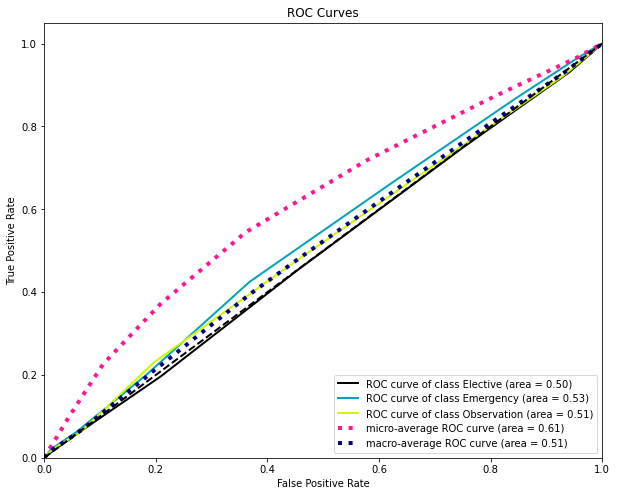

In [55]:
import scikitplot as skplt
y_probas=knn.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))

AUC for multi-class

multi_class {‘raise’, ‘ovr’, ‘ovo’}, default=’raise’

Multiclass only. Determines the type of configuration to use. The default value raises an error, so either 'ovr' or 'ovo' must be passed explicitly.

'ovr':

Computes the AUC of each class against the rest [3] [4]. This treats the multiclass case in the same way as the multilabel case. Sensitive to class imbalance even when average == 'macro', because class imbalance affects the composition of each of the ‘rest’ groupings.

'ovo':

Computes the average AUC of all possible pairwise combinations of classes [5]. Insensitive to class imbalance when average == 'macro'.

In [56]:
#https://medium.com/@plog397/auc-roc-curve-scoring-function-for-multi-class-classification-9822871a6659
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
# probs = y_probas[:, 1]
# print ('ROC AUC =', roc_auc_score(y_test, probs, multi_class='ovo'))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [57]:
multiclass_roc_auc_score(y_test, y_pred)

0.5035838133042777

AUC

What does AUC measure?
AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1). Figure 5. AUC (Area under the ROC Curve). AUC provides an aggregate measure of performance across all possible classification thresholds

Categorical variables, create dummies and hot encoding

In [58]:
df = pd.concat([df, pd.get_dummies(df['Area'], prefix='Area' , drop_first=False)], axis=1)
df = pd.concat([df, pd.get_dummies(df['Marital'], prefix='Marital', drop_first=False)], axis=1)
df = pd.concat([df, pd.get_dummies(df['Gender'], prefix='Gender', drop_first=False)], axis=1)
#df = pd.concat([df, pd.get_dummies(df['Initial_admin'], prefix='Initial_admin', drop_first=False)], axis=1)
df = pd.concat([df, pd.get_dummies(df['Complication_risk'], prefix='Complication_risk', drop_first=False)], axis=1)
df = pd.concat([df, pd.get_dummies(df['Services'], prefix='Services', drop_first=False)], axis=1)
df = pd.concat([df, pd.get_dummies(df['ReAdmis'], prefix='ReAdmis', drop_first=False)], axis=1)
#, drop_first=True

#for KNN, create K dummies instead of K-1
# (https://www.listendata.com/2017/12/k-nearest-neighbor-step-by-step-tutorial.html)

In [59]:
# why am i dropping the hot encoded categorical variables? it should be the 1-0 values

df.drop(['Area'],axis=1, inplace=True)
df.drop(['Marital'],axis=1, inplace=True)
df.drop(['Gender'],axis=1, inplace=True)
#df.drop(['Initial_admin'],axis=1, inplace=True)
df.drop(['Complication_risk'],axis=1, inplace=True)
df.drop(['Services'],axis=1, inplace=True)
df.drop(['TimeZone'], axis=1, inplace=True)
df.drop(['ReAdmis'], axis=1, inplace=True)

In [60]:
df.drop(['HighBlood'],axis=1, inplace=True)
df.drop(['Stroke'],axis=1, inplace=True)
df.drop(['Overweight'],axis=1, inplace=True)
df.drop(['Arthritis'],axis=1, inplace=True)
df.drop(['Diabetes'],axis=1, inplace=True)
df.drop(['Hyperlipidemia'],axis=1, inplace=True)
df.drop(['BackPain'], axis=1, inplace=True)
df.drop(['Anxiety'], axis=1, inplace=True)
df.drop(['Allergic_rhinitis'],axis=1, inplace=True)
df.drop(['Reflux_esophagitis'], axis=1, inplace=True)
df.drop(['Asthma'], axis=1, inplace=True)

Now replacing Yes/No with 1 or 0

In [61]:
# #df['ReAdmis']=df.ReAdmis.map(dict(Yes=1, No=0))
# df['HighBlood']=df.HighBlood.map(dict(Yes=1, No=0))
# df['Stroke']=df.Stroke.map(dict(Yes=1, No=0))
# df['Overweight']=df.Overweight.map(dict(Yes=1, No=0))
# df['Arthritis']=df.Arthritis.map(dict(Yes=1, No=0))
# df['Diabetes']=df.Diabetes.map(dict(Yes=1, No=0))
# df['Hyperlipidemia']=df.Hyperlipidemia.map(dict(Yes=1, No=0))
# df['BackPain']=df.BackPain.map(dict(Yes=1, No=0))
# df['Anxiety']=df.Anxiety.map(dict(Yes=1, No=0))
# df['Allergic_rhinitis']=df.Allergic_rhinitis.map(dict(Yes=1, No=0))
# df['Reflux_esophagitis']=df.Reflux_esophagitis.map(dict(Yes=1, No=0))
# df['Asthma']=df.Asthma.map(dict(Yes=1, No=0))

In [62]:
df.shape

(9252, 40)

In [63]:
df.head(5)

,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_admin,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Area_Rural,Area_Suburban,Area_Urban,Marital_Divorced,Marital_Married,Marital_Never_Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Complication_risk_High,Complication_risk_Low,Complication_risk_Medium,Services_Blood_Work,Services_CT_Scan,Services_Intravenous,Services_MRI,ReAdmis_No,ReAdmis_Yes
0,-0.475916,-0.497265,-0.024941,1.879521,0.594656,0.947403,-1.012306,-0.645078,Emergency,-0.904410,-0.724088,0.765677,-0.495254,-0.481819,-1.469542,-1.465406,0.494580,-0.502239,-0.484018,0.480089,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0
1,0.216989,0.555525,-0.121935,0.312032,0.493463,-0.974406,1.030856,1.062578,Emergency,-0.731800,-0.510241,0.715820,-0.495254,0.494482,-0.489212,0.475879,0.494580,0.473142,-0.484018,-0.488253,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0
2,0.699999,0.555525,-0.024941,-0.966392,0.049247,-0.974406,0.009275,-0.645078,Elective,-1.125258,-1.316580,0.699354,-1.475800,0.494482,0.491119,0.475879,-0.482123,0.473142,-0.484018,-0.488253,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0
3,-0.541374,-1.023660,1.187493,0.033592,-0.695763,-0.974406,0.009275,-0.645078,Elective,-1.241399,-1.457042,0.010210,-0.495254,1.470784,1.471449,-0.494763,0.494580,1.448523,1.497459,1.448431,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0
4,-0.282115,-0.497265,-1.528358,-1.485102,-0.261929,-0.013502,-1.012306,2.770235,Elective,-1.258876,-1.463807,-1.406783,-1.475800,-2.434423,-0.489212,-0.494763,1.471284,-0.502239,0.506720,-0.488253,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0


In [64]:
#df = df.drop(columns=titles)

#Combine both dataframes, categories and numerical

In [65]:
#df = pd.concat([scaled_df, df], axis=1)

In [66]:
df.head(5)

,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_admin,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Area_Rural,Area_Suburban,Area_Urban,Marital_Divorced,Marital_Married,Marital_Never_Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Complication_risk_High,Complication_risk_Low,Complication_risk_Medium,Services_Blood_Work,Services_CT_Scan,Services_Intravenous,Services_MRI,ReAdmis_No,ReAdmis_Yes
0,-0.475916,-0.497265,-0.024941,1.879521,0.594656,0.947403,-1.012306,-0.645078,Emergency,-0.904410,-0.724088,0.765677,-0.495254,-0.481819,-1.469542,-1.465406,0.494580,-0.502239,-0.484018,0.480089,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0
1,0.216989,0.555525,-0.121935,0.312032,0.493463,-0.974406,1.030856,1.062578,Emergency,-0.731800,-0.510241,0.715820,-0.495254,0.494482,-0.489212,0.475879,0.494580,0.473142,-0.484018,-0.488253,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0
2,0.699999,0.555525,-0.024941,-0.966392,0.049247,-0.974406,0.009275,-0.645078,Elective,-1.125258,-1.316580,0.699354,-1.475800,0.494482,0.491119,0.475879,-0.482123,0.473142,-0.484018,-0.488253,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0
3,-0.541374,-1.023660,1.187493,0.033592,-0.695763,-0.974406,0.009275,-0.645078,Elective,-1.241399,-1.457042,0.010210,-0.495254,1.470784,1.471449,-0.494763,0.494580,1.448523,1.497459,1.448431,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0
4,-0.282115,-0.497265,-1.528358,-1.485102,-0.261929,-0.013502,-1.012306,2.770235,Elective,-1.258876,-1.463807,-1.406783,-1.475800,-2.434423,-0.489212,-0.494763,1.471284,-0.502239,0.506720,-0.488253,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0


In [67]:
df.shape

(9252, 40)

In [68]:
df.to_csv('prepped_med_data.csv')

In [69]:
# cont_df = pd.concat([scaled_df, df['Initial_admin']], axis=1)
# cont_df.shape

Train Test Split

In [70]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.25)

x_train = train.drop('Initial_admin', axis=1)
y_train = train['Initial_admin']

x_test = test.drop('Initial_admin', axis = 1)
y_test = test['Initial_admin']

In [71]:
train.to_csv('train.csv')

In [72]:
test.to_csv('test.csv')

Gross KNN Implementation

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [74]:
print(knn.score(x_test, y_test))

0.4310419368785128


In [75]:
# Predict the labels for the training data X
y_pred = knn.predict(x_test)

In [76]:
pd.DataFrame(data={'Predicted': y_pred, 'Actual': y_test}).head(15)

,Predicted,Actual
7255,Emergency,Emergency
1202,Emergency,Emergency
5706,Emergency,Emergency
264,Emergency,Emergency
2135,Emergency,Elective
8098,Elective,Emergency
8580,Observation,Elective
2422,Observation,Elective
4613,Observation,Emergency
8628,Emergency,Emergency


In [77]:
from sklearn.metrics import accuracy_score
# print ('accuracy =', metrics.accuracy_score(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.4310419368785128


In [78]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='micro' )

0.4310419368785128

In [79]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred,  average='micro')

0.4310419368785128

In [80]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred,  average='micro')

0.43104193687851283

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Elective       0.30      0.22      0.25       575
   Emergency       0.52      0.66      0.58      1165
 Observation       0.25      0.18      0.21       573

    accuracy                           0.43      2313
   macro avg       0.35      0.35      0.35      2313
weighted avg       0.40      0.43      0.41      2313



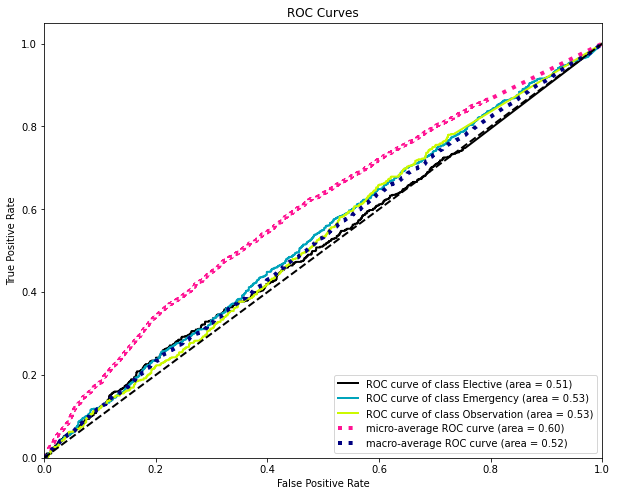

In [82]:
import scikitplot as skplt
y_probas=knn.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))

In [83]:
#https://medium.com/@plog397/auc-roc-curve-scoring-function-for-multi-class-classification-9822871a6659
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
# probs = y_probas[:, 1]
# print ('ROC AUC =', roc_auc_score(y_test, probs, multi_class='ovo'))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [84]:
multiclass_roc_auc_score(y_test, y_pred)

0.514555639471402

In [85]:
# Predict and print the label for the new data point X_new
new_prediction = knn.predict(x_test)
print("Prediction: {}".format(new_prediction))

Prediction: ['Emergency' 'Emergency' 'Emergency' ... 'Elective' 'Emergency'
 'Emergency']


In [86]:

from sklearn.feature_selection import SelectKBest, f_classif

array = df.values

X = df.drop('Initial_admin', axis=1)

Y = df['Initial_admin']

f_test = SelectKBest(f_classif, k=5)

#Fit the function for ranking the features by score

fit = f_test.fit(X, Y)

#Summarize scores numpy.set_printoptions(precision=3) print(fit.scores_)

#Apply the transformation on to dataset

features = fit.transform(X)

fit = fit.transform(X)
#Summarize selected features print(features[0:5,:])

In [87]:
print(type(features))

<class 'numpy.ndarray'>


In [88]:
print(features.shape)

(9252, 5)


In [89]:
print(features)

[[ 1.8795209   0.5946563  -0.72408774  0.76567673  0.        ]
 [ 0.31203169  0.49346321 -0.51024086  0.71582026  1.        ]
 [-0.96639229  0.04924707 -1.31658019  0.69935359  0.        ]
 ...
 [ 1.06530342 -0.41790952  1.36161796  0.35965352  1.        ]
 [-0.36209098  0.98157175  1.07189794 -0.78585532  0.        ]
 [ 0.9377923   0.21585117  1.1833259  -0.19603236  0.        ]]


In [90]:
print(f_test.get_support())

[False False False  True  True False False False False  True  True False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False]


In [91]:
ser = pd.DataFrame(f_test.get_support())

In [92]:
col = pd.DataFrame(df.columns)
features_sel = pd.concat([col,ser], axis=1)

In [93]:
features_sel

,0,0
0,Population,False
1,Children,False
2,Age,False
3,Income,True
4,VitD_levels,True
5,Doc_visits,False
6,Full_meals_eaten,False
7,vitD_supp,False
8,Initial_admin,False
9,Initial_days,True


selected features: Marital_Widowed, Anxiety, Additional_charges, TotalCharge, VitD_levels

Reduced Model

In [94]:
x_train = train[['Initial_days', 'Income', 'Gender_Nonbinary', 'TotalCharge', 'VitD_levels']]
y_train = train['Initial_admin']

x_test = test[['Initial_days', 'Income', 'Gender_Nonbinary', 'TotalCharge', 'VitD_levels']]
y_test = test['Initial_admin']

In [95]:
# knn = KNeighborsClassifier(n_neighbors=10)
# knn.fit(x_train, y_train)
# print(knn.score(x_test, y_test))

In [96]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
print(knn.score(x_test, y_test))

0.5667963683527886


In [97]:
# from sklearn import metrics
# #We are going to run it for k = 1 to 15 and will be recording testing accuracy, plotting it, showing confusion matrix and classification report:
# range_k = range(1,15)
# scores = {}
# scores_list = []
# for k in range_k:
#     classifier = KNeighborsClassifier(n_neighbors=k, weights='distance')
#     classifier.fit(x_train, y_train)
#     y_pred = classifier.predict(x_test)
#     scores[k] = metrics.accuracy_score(y_test,y_pred)
#     scores_list.append(metrics.accuracy_score(y_test,y_pred))
# result = metrics.confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(result)
# result1 = metrics.classification_report(y_test, y_pred)
# print("Classification Report:",)
# print (result1)

#### 

In [98]:
# Predict the labels for the training data X
y_pred = knn.predict(x_test)

In [99]:
pd.DataFrame(data={'Predicted': y_pred, 'Actual': y_test}).head(15)

,Predicted,Actual
7255,Emergency,Emergency
1202,Emergency,Emergency
5706,Elective,Emergency
264,Elective,Emergency
2135,Emergency,Elective
8098,Elective,Emergency
8580,Elective,Elective
2422,Emergency,Elective
4613,Emergency,Emergency
8628,Emergency,Emergency


In [100]:
from sklearn.metrics import accuracy_score
# print ('accuracy =', metrics.accuracy_score(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5667963683527886


In [101]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='micro' )

0.5667963683527886

In [102]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred,  average='micro')

0.5667963683527886

In [103]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred,  average='micro')

0.5667963683527886

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Elective       0.37      0.42      0.39       575
   Emergency       0.70      0.81      0.75      1165
 Observation       0.40      0.21      0.28       573

    accuracy                           0.57      2313
   macro avg       0.49      0.48      0.47      2313
weighted avg       0.54      0.57      0.55      2313



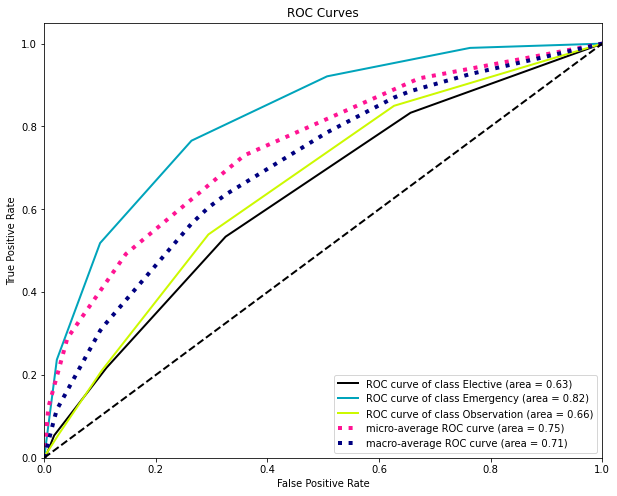

In [105]:
import scikitplot as skplt
y_probas=knn.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))

In [106]:
#https://medium.com/@plog397/auc-roc-curve-scoring-function-for-multi-class-classification-9822871a6659
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
# probs = y_probas[:, 1]
# print ('ROC AUC =', roc_auc_score(y_test, probs, multi_class='ovo'))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [107]:
multiclass_roc_auc_score(y_test, y_pred)

0.6248357759238431